In [17]:
# Files
import os
from astropy.io import fits

# Astropy stuff
from astropy.wcs import WCS
from reproject import reproject_interp

# Math
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times New Roman"
%matplotlib inline
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \usepackage{bm} \usepackage{physics}']
%config InlineBackend.figure_format = 'retina' # For high quality figures

# Astropy plotting style
from matplotlib.colors import LogNorm
# from astropy.visualization import astropy_mpl_style
# plt.style.use(astropy_mpl_style)

In [6]:
pluto_1_fname = os.path.join("data-2019-09-22-nickel-joey-vivian/masters", 
                             "pluto_master_full_cal_night_1_no_foo.fits")
pluto_2_fname = os.path.join("data-2019-09-23-nickel-joey-vivian/masters", 
                             "pluto_master_full_cal_night_2_no_foo.fits")

In [7]:
pluto_1_img    = fits.getdata(pluto_1_fname)
pluto_1_header = fits.getheader(pluto_1_fname)

pluto_2_img    = fits.getdata(pluto_2_fname)
pluto_2_header = fits.getheader(pluto_2_fname)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/Users/josephmurphy/anaconda/envs/astr_257/lib/python3.7/site-packages/reproject/interpolation/core_celestial.py:26: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(array.dtype, np.float):


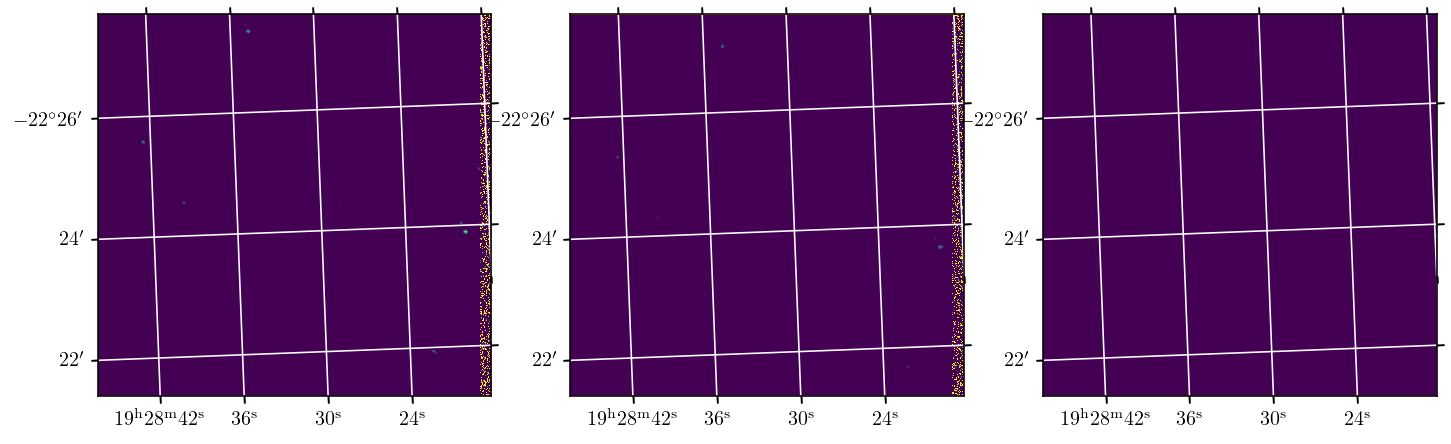

In [16]:
wcs_1 = WCS(pluto_1_header)

# Reproject the 2nd night image onto the coordinates of the 1st night, to account for small shifts in pointing
pluto_2_img_rproj, footprint = reproject_interp((pluto_2_img, pluto_2_header), pluto_1_header)

fig, axes = plt.subplots(ncols=3, figsize=(12, 7), sharex=True, sharey=True, subplot_kw={'projection':wcs_1})
axes[0].set_aspect('equal', share=True)

vmin = 1e-2
vmax = 1e3
norm = LogNorm(vmin=vmin, vmax=vmax)
axes[0].imshow(pluto_1_img, norm=norm)
axes[1].imshow(pluto_2_img_rproj, norm=norm)
axes[2].imshow(footprint, norm=norm)

[ax.grid(color='white', ls='solid') for ax in axes]

plt.show()

In [9]:
reproject_interp?

In [40]:
np.min(pluto_1_img)

-31361128.606363636